In [2]:
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import odeint

In [4]:
def f(a,b):
    return a+b 

In [8]:
f(2.,6.)

8.0

In [9]:
def SIR(y,t,N,alpha,beta):
    S,I,R = y
    dS=-alpha*S*I/N
    dI=alpha*S*I/N-beta*I
    dR=beta*I
    return dS,dI,dR

In [10]:
N=47000000
I0=10000
R0=0
S0=N-I0-R0
##tasa de contagio##
alpha=0.1
##tasa de remoción#
beta=0.02
y0=S0,I0,R0

In [23]:
T=linspace(0,365,365)

In [21]:
#T=arange(0.,365.,1/24)

In [24]:
T

array([  0.        ,   1.00274725,   2.00549451,   3.00824176,
         4.01098901,   5.01373626,   6.01648352,   7.01923077,
         8.02197802,   9.02472527,  10.02747253,  11.03021978,
        12.03296703,  13.03571429,  14.03846154,  15.04120879,
        16.04395604,  17.0467033 ,  18.04945055,  19.0521978 ,
        20.05494505,  21.05769231,  22.06043956,  23.06318681,
        24.06593407,  25.06868132,  26.07142857,  27.07417582,
        28.07692308,  29.07967033,  30.08241758,  31.08516484,
        32.08791209,  33.09065934,  34.09340659,  35.09615385,
        36.0989011 ,  37.10164835,  38.1043956 ,  39.10714286,
        40.10989011,  41.11263736,  42.11538462,  43.11813187,
        44.12087912,  45.12362637,  46.12637363,  47.12912088,
        48.13186813,  49.13461538,  50.13736264,  51.14010989,
        52.14285714,  53.1456044 ,  54.14835165,  55.1510989 ,
        56.15384615,  57.15659341,  58.15934066,  59.16208791,
        60.16483516,  61.16758242,  62.17032967,  63.17

In [27]:
s1=odeint(SIR,y0,T,args=(N,alpha,beta))

In [42]:
s1[0][0]

46990000.0

In [45]:
s1[:,0]

array([46990000.        , 46988956.18066397, 46987825.22899658,
       46986599.87697796, 46985272.2512661 , 46983833.82292985,
       46982275.35322917, 46980586.83435803, 46978757.42596041,
       46976775.38624518, 46974627.99722846, 46972301.48404387,
       46969780.92761404, 46967050.17014016, 46964091.71313856,
       46960886.60672382, 46957414.33020452, 46953652.66311226,
       46949577.54563358, 46945162.92791494, 46940380.60715544,
       46935200.05179763, 46929588.21172249, 46923509.31329976,
       46916924.6383774 , 46909792.28583995, 46902066.91452822,
       46893699.46662118, 46884636.86864723, 46874821.71107046,
       46864191.90199821, 46852680.29638541, 46840214.2960427 ,
       46826715.42170092, 46812098.8523343 , 46796272.93285386,
       46779138.64552987, 46760589.04576495, 46740508.65818861,
       46718772.83302189, 46695247.05973691, 46669786.23698948,
       46642233.89761943, 46612421.38554001, 46580166.98868597,
       46545275.01838536, 46507534.84782

Text(0.5, 1.0, 'Modelo Kermack-McKendrick')

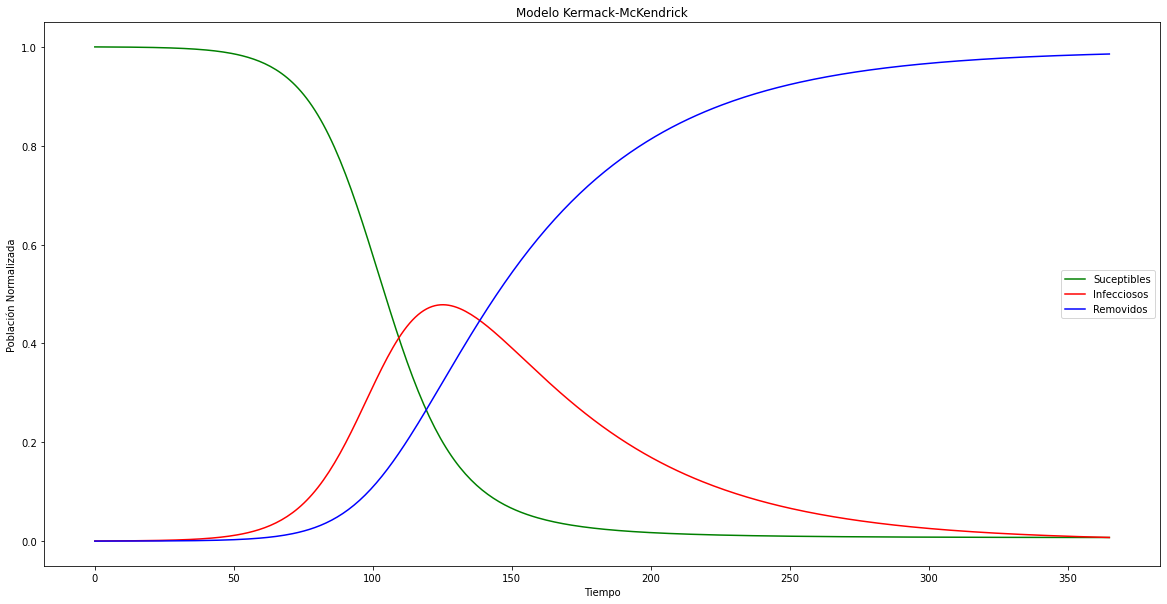

In [63]:
fig,ax=subplots(figsize=(20,10))
ax.plot(T,s1[:,0]/N,label='Suceptibles',color='g')
ax.plot(T,s1[:,1]/N,label='Infecciosos',color='r')
ax.plot(T,s1[:,2]/N,label='Removidos',color='b')
ax.legend()
ax.set_xlabel('Tiempo')
ax.set_ylabel(r'Población Normalizada')
ax.set_title('Modelo Kermack-McKendrick')

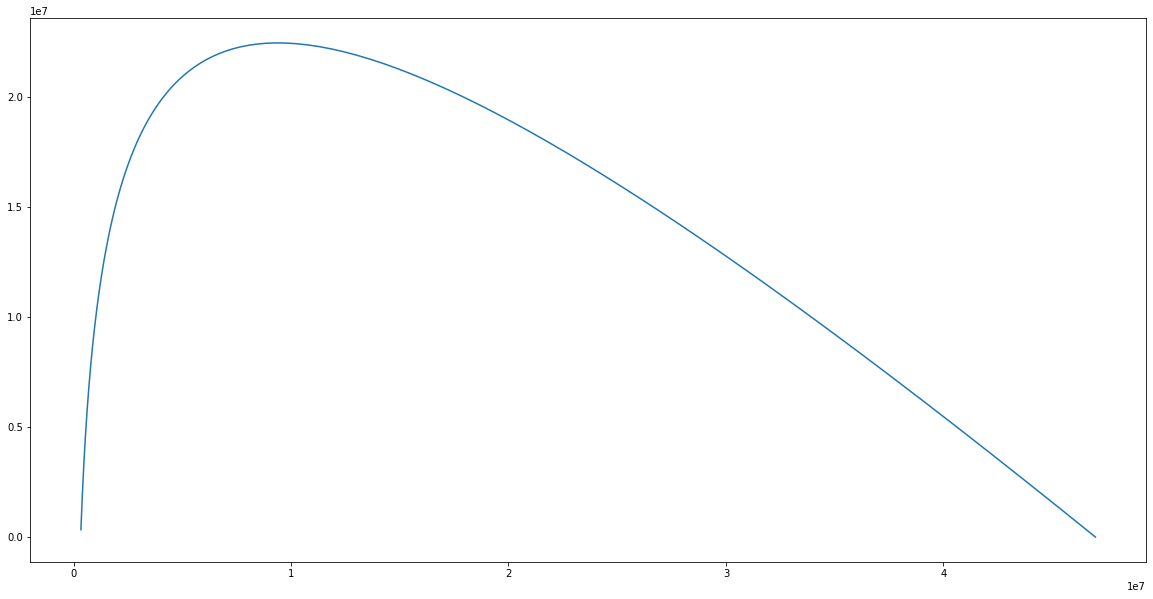

In [64]:
fig,ax=subplots(figsize=(20,10))
ax.plot(s1[:,0],s1[:,1])


In [65]:
A=arange(0.1,1,0.2)
B=arange(0.02,0.1,0.04)
N=120000000.

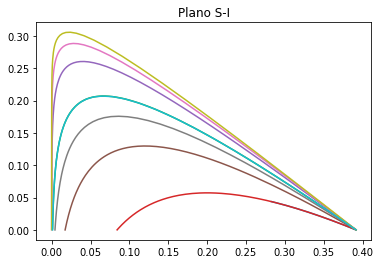

In [70]:
for a in A:
    for b in B:
        sol=odeint(SIR,y0,T,args=(N,a,b))
        plot(sol[:,0]/N,sol[:,1]/N,label=r'$\alpha=$%f,$\beta=$%f'%(a,b))
        title('Plano S-I')
        #legend()

In [73]:
len(sol.T)

3

In [77]:
S,I,R=sol.T

In [101]:
alpha=0.75
beta=0.01
mu=0.2
Rc=R*(1-mu)
M=R-Rc

Text(0.5, 1.0, 'Modelo Kermack-McKendrick')

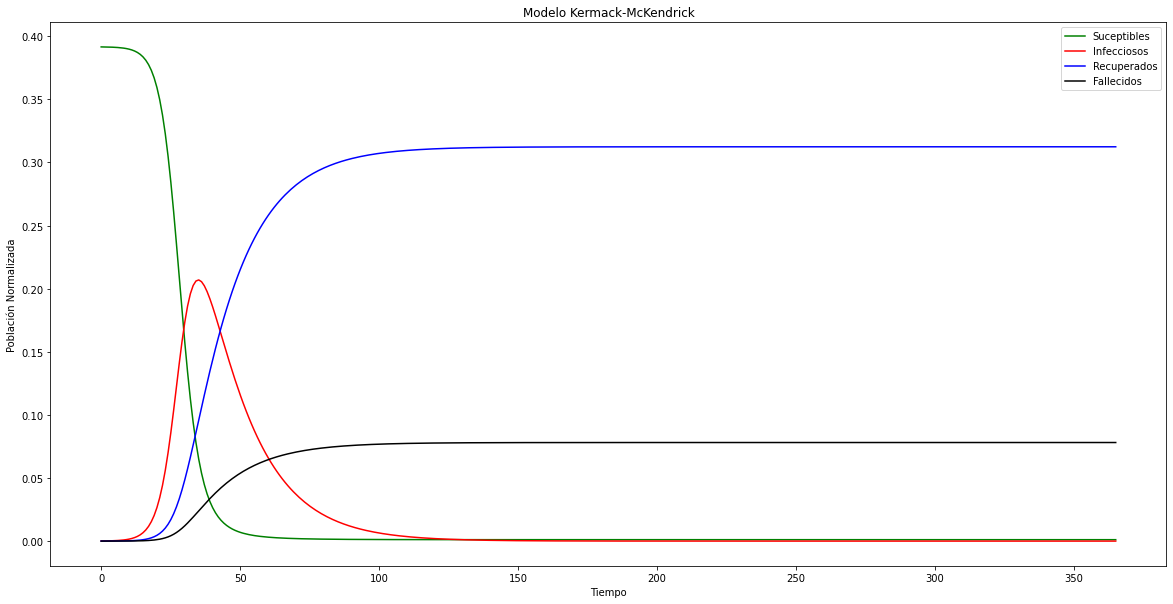

In [102]:
fig,ax=subplots(figsize=(20,10))
ax.plot(T,S/N,label='Suceptibles',color='g')
ax.plot(T,I/N,label='Infecciosos',color='r')
ax.plot(T,Rc/N,label='Recuperados',color='b')
ax.plot(T,M/N,label='Fallecidos',color='k')
ax.legend()
ax.set_xlabel('Tiempo')
ax.set_ylabel(r'Población Normalizada')
ax.set_title('Modelo Kermack-McKendrick')